In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report

2021-10-16 08:51:09.465067: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0


In [11]:
image_path = "../input/asl-alphabet/asl_alphabet_train/asl_alphabet_train"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  image_path,
  image_size=(224,224),
  batch_size=32,
validation_split=0.25,
  subset="training",
  seed=223,
color_mode = 'grayscale')


val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  image_path,
  image_size=(224,224),
  batch_size=32,
validation_split=0.25,
  subset="validation",
  seed=223,
color_mode = 'grayscale')

test_path = "../input/asl-alphabet/asl_alphabet_test/asl_alphabet_test"



Found 87000 files belonging to 29 classes.
Using 65250 files for training.
Found 87000 files belonging to 29 classes.
Using 21750 files for validation.


In [4]:
import glob
import pathlib 

data_dir = pathlib.Path(image_path)
class_names = np.array(sorted([item.name for item in data_dir.glob('*') if item.name != "LICENSE.txt"]))
print(class_names)

['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R'
 'S' 'T' 'U' 'V' 'W' 'X' 'Y' 'Z' 'del' 'nothing' 'space']


In [12]:
import cv2
import os

test_class = []
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        test_class.append(filename[0])
        img = cv2.imread(os.path.join(folder,filename), 0)
        img = cv2.resize(img , (224,224))
        if img is not None:
            images.append(img)
    return images

pred_images = load_images_from_folder(test_path)
test_class

['A',
 'E',
 'L',
 'N',
 'S',
 'D',
 'G',
 'I',
 'W',
 'M',
 'n',
 'X',
 'H',
 'Q',
 'C',
 'T',
 'P',
 'V',
 'Y',
 'U',
 's',
 'O',
 'B',
 'R',
 'F',
 'Z',
 'J',
 'K']

In [13]:
type(pred_images)

list

In [7]:
pred_images = np.array(pred_images)
print(pred_images.shape)
pred_images_resized = pred_images.reshape(pred_images.shape[0], 224, 224, 1)
print(pred_images_resized.shape)

(28, 224, 224)
(28, 224, 224, 1)


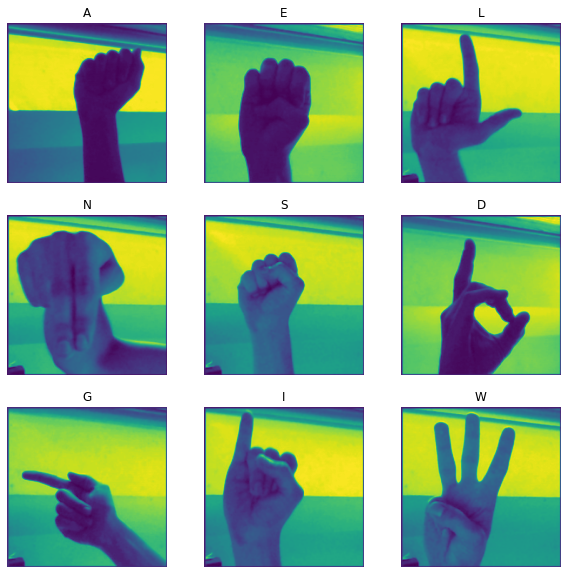

In [14]:
## visualize prediction images 
plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(pred_images[i])
    plt.title(test_class[i])
    plt.axis("off")

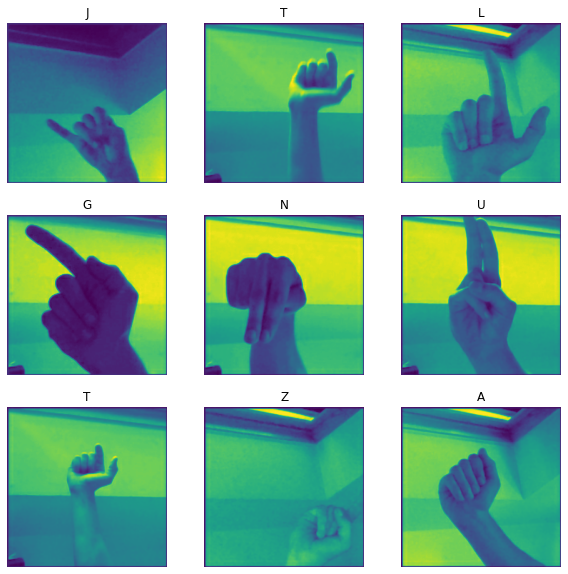

In [15]:
## visualize train set images
image_batch, label_batch = next(iter(train_ds))
plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    label = label_batch[i]
    name = class_names[label]
    plt.title(name)
    plt.axis("off")

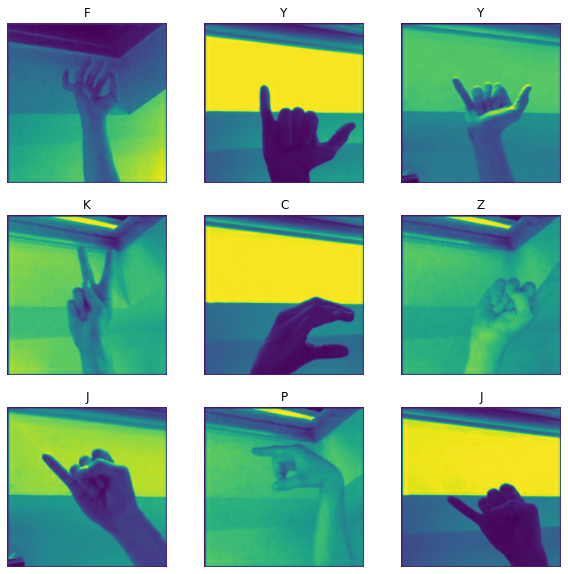

In [10]:
## visualize validation images 
image_batch, label_batch = next(iter(val_ds))
plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    label = label_batch[i]
    name = class_names[label]
    plt.title(name)
    plt.axis("off")

Epoch 1/10


2021-10-16 08:55:39.600547: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.11
2021-10-16 08:55:40.492020: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.11
2021-10-16 08:55:40.513351: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.8


2040/2040 [==============================] - 352s 169ms/step - loss: 20.2900 - accuracy: 0.5276 - val_loss: 0.3434 - val_accuracy: 0.8874
Epoch 2/10
2040/2040 [==============================] - 115s 56ms/step - loss: 0.2397 - accuracy: 0.9167 - val_loss: 0.3473 - val_accuracy: 0.8896
Epoch 3/10
2040/2040 [==============================] - 114s 56ms/step - loss: 0.1605 - accuracy: 0.9454 - val_loss: 0.3203 - val_accuracy: 0.9041
Epoch 4/10
2040/2040 [==============================] - 115s 56ms/step - loss: 0.1191 - accuracy: 0.9600 - val_loss: 0.2202 - val_accuracy: 0.9340
Epoch 5/10
2040/2040 [==============================] - 115s 56ms/step - loss: 0.1132 - accuracy: 0.9666 - val_loss: 0.2254 - val_accuracy: 0.9373
Epoch 6/10
2040/2040 [==============================] - 116s 56ms/step - loss: 0.0944 - accuracy: 0.9718 - val_loss: 0.2375 - val_accuracy: 0.9411
Epoch 7/10
2040/2040 [==============================] - 114s 56ms/step - loss: 0.0749 - accuracy: 0.9766 - val_loss: 0.2016 - v

2021-10-16 09:19:13.656510: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


Classification Report
              precision    recall  f1-score   support

           A       0.96      0.91      0.94       773
           B       0.93      0.98      0.95       745
           C       0.97      0.98      0.97       745
           D       0.97      0.94      0.95       781
           E       0.94      0.92      0.93       745
           F       0.95      0.97      0.96       742
           G       0.97      0.90      0.94       710
           H       0.95      0.95      0.95       818
           I       0.97      0.96      0.97       724
           J       0.94      0.97      0.96       754
           K       0.91      0.99      0.95       741
           L       0.99      0.96      0.98       714
           M       0.98      0.95      0.96       708
           N       0.98      0.97      0.97       724
           O       0.92      0.97      0.95       719
           P       0.98      0.93      0.96       744
           Q       0.94      0.99      0.97       769
     

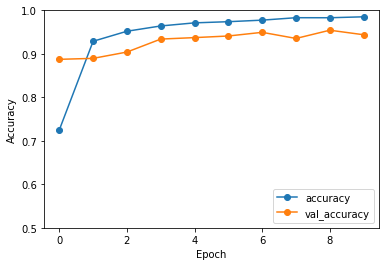

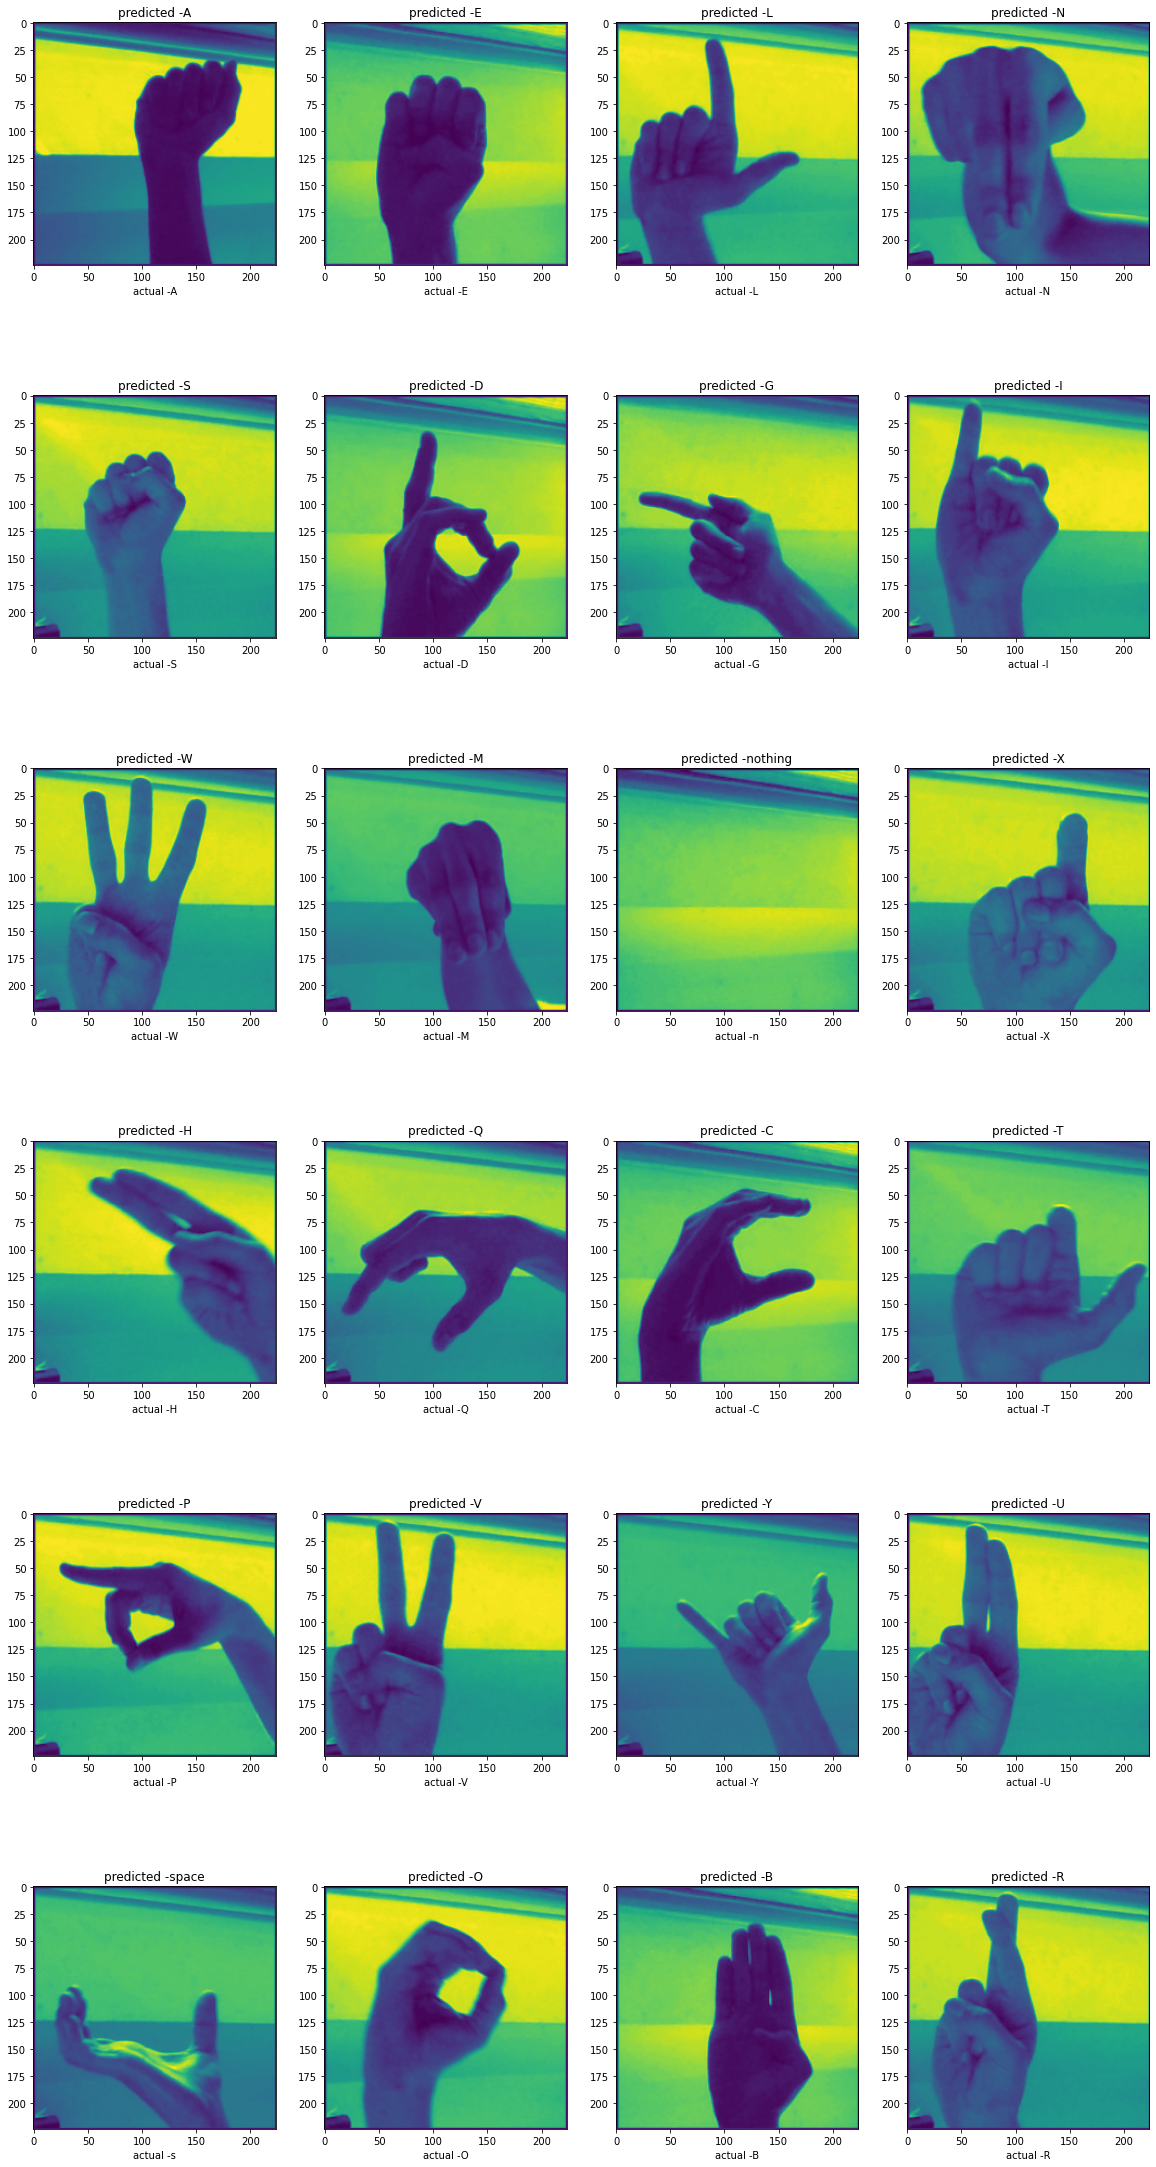

In [16]:
## two layer CNN with lesser filter 8, 8

##
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D( activation='relu', input_shape=(224, 224, 1), filters = 8, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)), 
     tf.keras.layers.Conv2D( activation='relu', input_shape=(224, 224, 1), filters = 8, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)),   
  tf.keras.layers.Flatten(),
tf.keras.layers.Dense(128, activation=tf.nn.relu),
tf.keras.layers.Dense(29, activation=tf.nn.softmax)])


model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'], )
%time history = model.fit(train_ds, epochs=10, validation_data = val_ds)
##
test_loss, test_acc = model.evaluate(val_ds)
print("Test image accuracy :{}".format(test_acc))
##
plt.plot(history.history['accuracy'], '-o' ,label='accuracy')
plt.plot(history.history['val_accuracy'], '-o', label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
##
model.save('model_cnn2')
## for validation data set , check the classification report.
val_pred = np.array([])
val_labels = np.array([])
for x, y in val_ds:
    predictions =  np.argmax(model.predict(x), axis = -1)
    val_pred = np.concatenate([val_pred,np.array(predictions)])
    val_labels = np.concatenate([val_labels , y.numpy()])
    
##
print('Classification Report')
target_names = class_names
print(classification_report(val_labels, val_pred, target_names=class_names))
##
print(model.summary())
##
predicted_labels = model.predict(pred_images_resized)
pred_labels = np.argmax(predicted_labels, axis = -1)
##
## visualize prediction images with the prediction 
plt.figure(figsize=(20, 40))
for i in range(24):
    ax = plt.subplot(6, 4, i + 1)
    plt.imshow(pred_images[i])
    plt.title("predicted -" + class_names[pred_labels[i]])
    plt.xlabel("actual -" + test_class[i])

The model has 100% test set accuracy for  this fold of  cross validation and with this set of training and validation images.   